In [774]:
import numpy as np
import pandas as pd
import random
import math

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Разделение датасета
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

# 3. Модели
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

# 4. Метрики качества
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

# 5. Для визуализации внешних картинок в ноутбуке
from IPython.display import Image

In [775]:
import warnings
warnings.filterwarnings('ignore')

In [776]:
TRAIN_DATASET_PATH = 'D:\python pr\project_data_from_kaggle/train.csv' # y_train, y_valid
TEST_DATASET_PATH = 'D:\python pr\project_data_from_kaggle/test.csv'

In [777]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855
9999,7202,94,1.0,35.815476,22.301367,6.0,9,9.0,1975,0.127376,B,B,43,8429,3,NaN,3,9,B,177685.627486


In [778]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
4995,10379,29,2.0,43.177521,30.339945,5.0,6,5.0,1962,0.069660,B,B,31,6119,4,NaN,1,2,B
4996,16138,38,3.0,93.698122,94.521465,10.0,21,27.0,2018,0.060753,B,B,15,2787,2,520.0,0,7,B
4997,3912,101,1.0,33.656723,19.003259,5.0,2,5.0,1966,0.038693,B,B,28,6533,1,1015.0,2,5,B
4998,5722,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,B,B,33,7976,5,NaN,0,11,B
4999,11004,21,2.0,67.122742,33.944344,13.0,9,17.0,2009,0.194489,B,B,47,8004,3,125.0,3,5,B


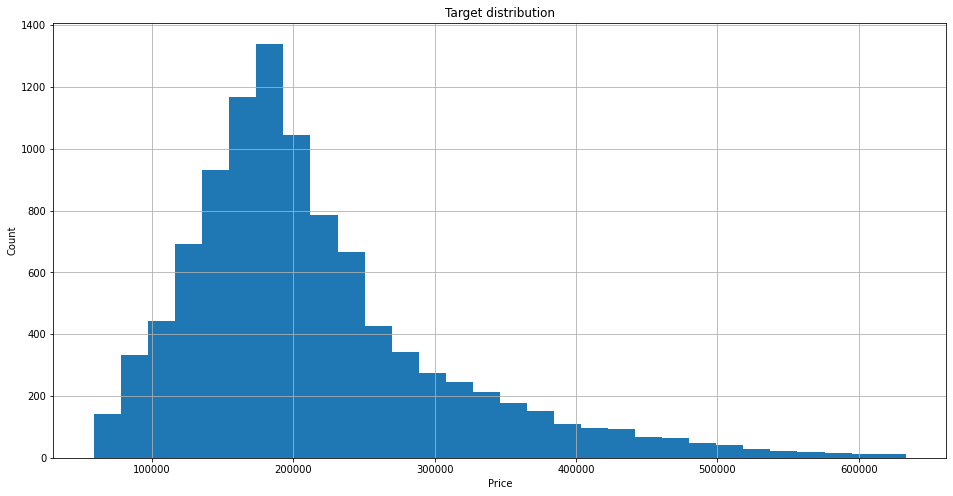

In [779]:
plt.figure(figsize = (16, 8))

train_df['Price'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Price')

plt.title('Target distribution')
plt.show()

In [780]:
train_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [781]:
train_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [ ]:
Обработка выбросов

In [782]:
train_df.loc[(train_df['Floor']==0) | ((train_df['Floor'] > train_df['HouseFloor']) & (train_df['HouseFloor']!=0)),'Floor']=train_df['HouseFloor']

In [783]:
train_df.loc[train_df['HouseFloor']==0,'HouseFloor']=train_df['HouseFloor'].mean()

In [784]:
train_df.loc[(train_df['LifeSquare'] < 10) | (train_df['LifeSquare'].isnull()), 'LifeSquare'] = 10

In [785]:
train_df.loc[train_df['KitchenSquare'] < 3, 'KitchenSquare'] = 3

In [786]:
train_df.loc[train_df['Rooms'] ==0, 'Rooms'] =1

In [787]:
train_df['Rooms'] =round(train_df['Rooms'])

In [788]:
train_df.loc[train_df['HouseYear'] > 2022, 'HouseYear'] = 2022

In [789]:
train_df['Ecology_2']=train_df['Ecology_2'].replace('B', 1)

In [790]:
train_df['Ecology_2']=train_df['Ecology_2'].replace('A', 0)

In [791]:
train_df['Ecology_3']=train_df['Ecology_3'].replace('A', 0)

In [792]:
train_df['Ecology_3']=train_df['Ecology_3'].replace('B', 1)

In [793]:
train_df['Shops_2']=train_df['Shops_2'].replace('A', 0)

In [794]:
train_df['Shops_2']=train_df['Shops_2'].replace('B', 1)

In [795]:
train_df.loc[train_df['Id'].isnull(), 'Id'] = train_df['Id'].mean()

In [796]:
train_df.loc[np.isinf(train_df['Id']), 'Id'] = train_df['Id'].mean()

In [797]:
train_df.loc[train_df['DistrictId'].isnull(), 'DistrictId'] = train_df['DistrictId'].mean()

In [798]:
train_df.loc[np.isinf(train_df['DistrictId']), 'DistrictId'] = train_df['DistrictId'].mean()

In [799]:
train_df.loc[train_df['Rooms'].isnull(), 'Rooms'] = train_df['Rooms'].mean()

In [800]:
train_df.loc[np.isinf(train_df['Rooms']), 'Rooms'] = train_df['Rooms'].mean()

In [801]:
train_df.loc[train_df['Square'].isnull(), 'Square'] = train_df['Square'].mean()

In [802]:
train_df.loc[np.isinf(train_df['Square']), 'Square'] = train_df['Square'].mean()

In [803]:
train_df.loc[train_df['LifeSquare'].isnull(), 'LifeSquare'] = train_df['LifeSquare'].mean()

In [804]:
train_df.loc[np.isinf(train_df['LifeSquare']), 'LifeSquare'] = train_df['LifeSquare'].mean()

In [805]:
train_df.loc[train_df['KitchenSquare'].isnull(), 'KitchenSquare'] = train_df['KitchenSquare'].mean()

In [806]:
train_df.loc[np.isinf(train_df['KitchenSquare']), 'KitchenSquare'] = train_df['KitchenSquare'].mean()

In [807]:
train_df.loc[train_df['Floor'].isnull(), 'Floor'] = train_df['Floor'].mean()

In [808]:
train_df.loc[np.isinf(train_df['Floor']), 'Floor'] = train_df['Floor'].mean()

In [809]:
train_df.loc[train_df['HouseFloor'].isnull(), 'HouseFloor'] = train_df['HouseFloor'].mean()

In [810]:
train_df.loc[np.isinf(train_df['HouseFloor']), 'HouseFloor'] = train_df['HouseFloor'].mean()

In [811]:
train_df.loc[train_df['HouseYear'].isnull(), 'HouseYear'] = train_df['HouseYear'].mean()

In [812]:
train_df.loc[np.isinf(train_df['HouseYear']), 'HouseYear'] = train_df['HouseYear'].mean()

In [813]:
train_df.loc[train_df['Ecology_1'].isnull(), 'Ecology_1'] = train_df['Ecology_1'].mean()

In [814]:
train_df.loc[np.isinf(train_df['Ecology_1']), 'Ecology_1'] = train_df['Ecology_1'].mean()

In [815]:
train_df.loc[train_df['Ecology_2'].isnull(), 'Ecology_2'] = train_df['Ecology_2'].mean()

In [816]:
train_df.loc[np.isinf(train_df['Ecology_2']), 'Ecology_2'] = train_df['Ecology_2'].mean()

In [817]:
train_df.loc[train_df['Ecology_3'].isnull(), 'Ecology_3'] = train_df['Ecology_3'].mean()

In [818]:
train_df.loc[np.isinf(train_df['Ecology_3']), 'Ecology_3'] = train_df['Ecology_3'].mean()

In [819]:
train_df.loc[train_df['Social_1'].isnull(), 'Social_1'] = train_df['Social_1'].mean()

In [820]:
train_df.loc[np.isinf(train_df['Social_1']), 'Social_1'] = train_df['Social_1'].mean()

In [821]:
train_df.loc[train_df['Social_2'].isnull(), 'Social_2'] = train_df['Social_2'].mean()

In [822]:
train_df.loc[np.isinf(train_df['Social_2']), 'Social_2'] = train_df['Social_2'].mean()

In [823]:
train_df.loc[train_df['Social_3'].isnull(), 'Social_3'] = train_df['Social_3'].mean()

In [824]:
train_df.loc[np.isinf(train_df['Social_3']), 'Social_3'] = train_df['Social_3'].mean()

In [825]:
train_df.loc[train_df['Helthcare_2'].isnull(), 'Helthcare_2'] = train_df['Helthcare_2'].mean()

In [826]:
train_df.loc[np.isinf(train_df['Helthcare_2']), 'Helthcare_2'] = train_df['Helthcare_2'].mean()

In [827]:
train_df.loc[train_df['Shops_1'].isnull(), 'Shops_1'] = train_df['Shops_1'].mean()

In [828]:
train_df.loc[np.isinf(train_df['Shops_1']), 'Shops_1'] = train_df['Shops_1'].mean()

In [829]:
train_df.loc[train_df['Shops_2'].isnull(), 'Shops_2'] = train_df['Shops_2'].mean()

In [830]:
train_df.loc[np.isinf(train_df['Shops_2']), 'Shops_2'] = train_df['Shops_2'].mean()

In [831]:
train_df.loc[train_df['Healthcare_1'].isnull(), 'Healthcare_1'] = train_df['Healthcare_1'].mean()

In [832]:
train_df.loc[np.isinf(train_df['Healthcare_1']), 'Healthcare_1'] = train_df['Healthcare_1'].mean()

In [ ]:
Построение моделей

In [833]:
def evaluate_preds(true_values, pred_values, save=False):
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )
    
    plt.figure(figsize=(8,8))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')

In [ ]:
Разбиение на train / valid 

In [834]:
feature_names=train_df.keys().drop('Price')

In [835]:
x = train_df[feature_names]
y = train_df['Price']

In [836]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.5, random_state=42)

In [ ]:
Linear Regression

In [837]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [838]:
y_train_preds = lr_model.predict(x_train)

In [839]:
# Постпроцессинг
y_train_preds = np.clip(y_train_preds, a_min=10000, a_max=500000)

R2:	0.482
RMSE:	65929.556
MSE:	4346706311.534


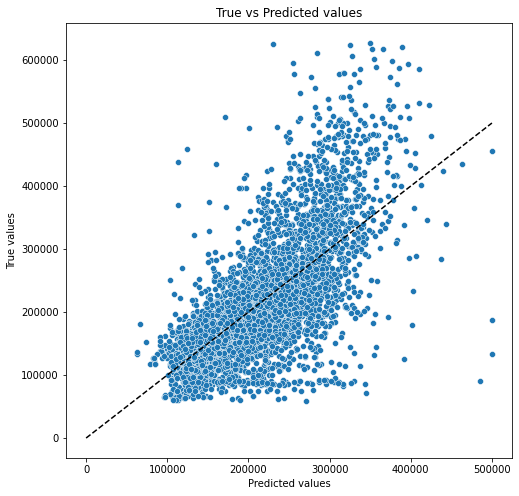

In [840]:
evaluate_preds(y_train, y_train_preds)

R2:	0.49
RMSE:	67216.379
MSE:	4518041561.116


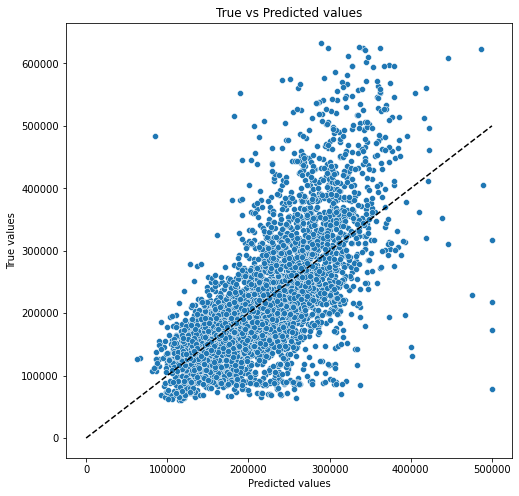

In [841]:
y_valid_preds = lr_model.predict(x_valid)

# Постпроцессинг
y_valid_preds = np.clip(y_valid_preds, a_min=10000, a_max=500000)

evaluate_preds(y_valid, y_valid_preds)

In [ ]:
DecisionTree

R2:	1.0
RMSE:	0.0
MSE:	0.0


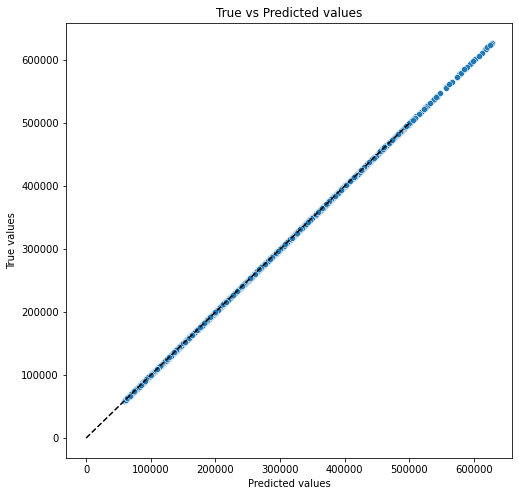

In [842]:
dt_model = DecisionTreeRegressor(criterion='mse', 
                                 max_depth=400, # глубина дерева  
                                 min_samples_leaf=1, # минимальное кол-во наблюдений в листе дерева
                                 random_state=42)
dt_model.fit(x_train, y_train)

y_train_preds = dt_model.predict(x_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.473
RMSE:	68300.402
MSE:	4664944940.434


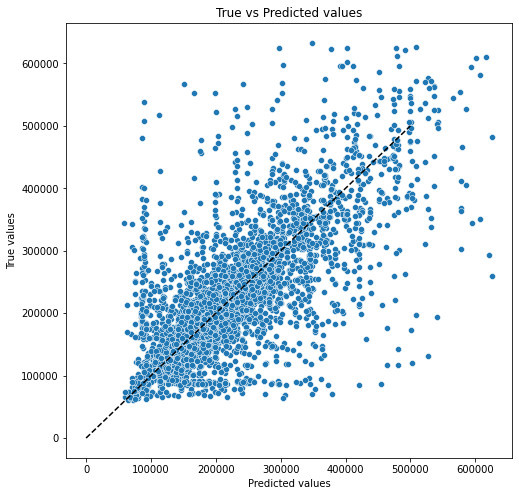

In [843]:
y_valid_preds = dt_model.predict(x_valid)
evaluate_preds(y_valid, y_valid_preds)

In [ ]:
RandomForest

R2:	0.715
RMSE:	48880.148
MSE:	2389268876.035


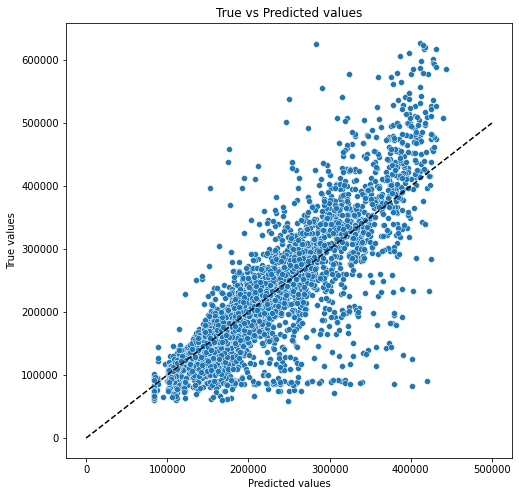

In [844]:
rf_model = RandomForestRegressor(criterion='mse',
                                 max_depth=20, # глубина дерева  
                                 min_samples_leaf=30, # минимальное кол-во наблюдений в листе дерева
                                 random_state=42,
                                 n_estimators=100  # кол-во деревьев
                                 )

rf_model.fit(x_train, y_train)
y_train_preds = rf_model.predict(x_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.671
RMSE:	53927.536
MSE:	2908179113.866


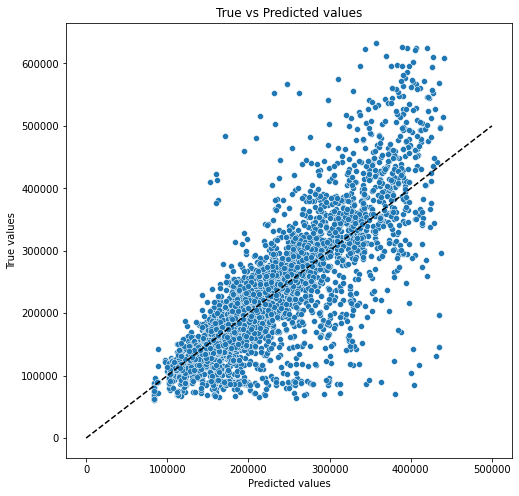

In [845]:
y_valid_preds = rf_model.predict(x_valid)
evaluate_preds(y_valid, y_valid_preds)

In [ ]:
GradientBoosting

R2:	0.915
RMSE:	26757.807
MSE:	715980218.713


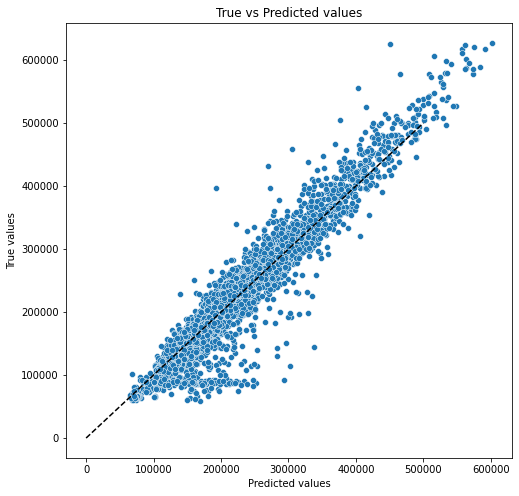

In [846]:
gb_model = GradientBoostingRegressor(criterion='mse',
                                     max_depth=7,
                                     min_samples_leaf=10,
                                     random_state=42,  
                                     n_estimators=100)
gb_model.fit(x_train, y_train)

y_train_preds = gb_model.predict(x_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.728
RMSE:	49041.941
MSE:	2405111931.95


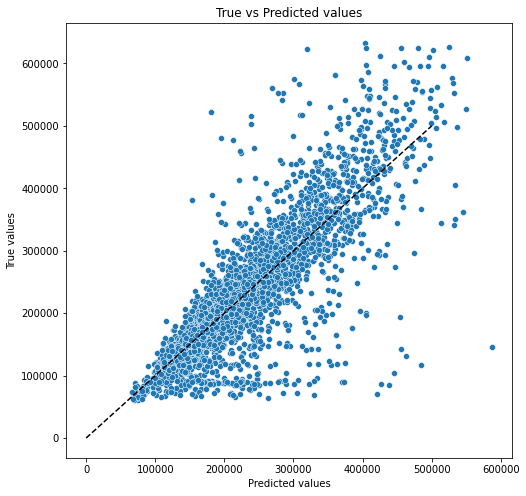

In [847]:
y_valid_preds = gb_model.predict(x_valid)
evaluate_preds(y_valid, y_valid_preds)

In [ ]:
Выбираем GradientBoosting

In [ ]:
Обработка выбросов

In [848]:
test_df.loc[(test_df['Floor']==0) | ((test_df['Floor'] > test_df['HouseFloor']) & (test_df['HouseFloor']!=0)),'Floor']=test_df['HouseFloor']

In [849]:
test_df.loc[test_df['HouseFloor']==0,'HouseFloor']=test_df['HouseFloor'].mean()

In [850]:
test_df.loc[(test_df['LifeSquare'] < 10) | (test_df['LifeSquare'].isnull()), 'LifeSquare'] = 10

In [851]:
test_df.loc[test_df['KitchenSquare'] < 3, 'KitchenSquare'] = 3

In [852]:
test_df.loc[test_df['Rooms'] ==0, 'Rooms'] =1

In [853]:
test_df['Rooms'] =round(test_df['Rooms'])

In [854]:
test_df.loc[test_df['HouseYear'] > 2022, 'HouseYear'] = 2022

In [855]:
test_df['Ecology_2']=test_df['Ecology_2'].replace('B', 1)

In [856]:
test_df['Ecology_2']=test_df['Ecology_2'].replace('A', 0)

In [857]:
test_df['Ecology_3']=test_df['Ecology_3'].replace('A', 0)

In [858]:
test_df['Ecology_3']=test_df['Ecology_3'].replace('B', 1)

In [859]:
test_df['Shops_2']=test_df['Shops_2'].replace('A', 0)

In [860]:
test_df['Shops_2']=test_df['Shops_2'].replace('B', 1)

In [861]:
test_df.loc[test_df['Id'].isnull(), 'Id'] = test_df['Id'].mean()

In [862]:
test_df.loc[np.isinf(test_df['Id']), 'Id'] = test_df['Id'].mean()

In [863]:
test_df.loc[test_df['DistrictId'].isnull(), 'DistrictId'] = test_df['DistrictId'].mean()

In [864]:
test_df.loc[np.isinf(test_df['DistrictId']), 'DistrictId'] = test_df['DistrictId'].mean()

In [865]:
test_df.loc[test_df['Rooms'].isnull(), 'Rooms'] = test_df['Rooms'].mean()

In [866]:
test_df.loc[np.isinf(test_df['Rooms']), 'Rooms'] = test_df['Rooms'].mean()

In [867]:
test_df.loc[test_df['Square'].isnull(), 'Square'] = test_df['Square'].mean()

In [868]:
test_df.loc[np.isinf(test_df['Square']), 'Square'] = test_df['Square'].mean()

In [869]:
test_df.loc[test_df['LifeSquare'].isnull(), 'LifeSquare'] = test_df['LifeSquare'].mean()

In [870]:
test_df.loc[np.isinf(test_df['LifeSquare']), 'LifeSquare'] = test_df['LifeSquare'].mean()

In [871]:
test_df.loc[test_df['KitchenSquare'].isnull(), 'KitchenSquare'] = test_df['KitchenSquare'].mean()

In [872]:
test_df.loc[np.isinf(test_df['KitchenSquare']), 'KitchenSquare'] = test_df['KitchenSquare'].mean()

In [873]:
test_df.loc[test_df['Floor'].isnull(), 'Floor'] = test_df['Floor'].mean()

In [874]:
test_df.loc[np.isinf(test_df['Floor']), 'Floor'] = test_df['Floor'].mean()

In [875]:
test_df.loc[test_df['HouseFloor'].isnull(), 'HouseFloor'] = test_df['HouseFloor'].mean()

In [876]:
test_df.loc[np.isinf(test_df['HouseFloor']), 'HouseFloor'] = test_df['HouseFloor'].mean()

In [877]:
test_df.loc[test_df['HouseYear'].isnull(), 'HouseYear'] = test_df['HouseYear'].mean()

In [878]:
test_df.loc[np.isinf(test_df['HouseYear']), 'HouseYear'] = test_df['HouseYear'].mean()

In [879]:
test_df.loc[test_df['Ecology_1'].isnull(), 'Ecology_1'] = test_df['Ecology_1'].mean()

In [880]:
test_df.loc[np.isinf(test_df['Ecology_1']), 'Ecology_1'] = test_df['Ecology_1'].mean()

In [881]:
test_df.loc[test_df['Ecology_2'].isnull(), 'Ecology_2'] = test_df['Ecology_2'].mean()

In [882]:
test_df.loc[np.isinf(test_df['Ecology_2']), 'Ecology_2'] = test_df['Ecology_2'].mean()

In [883]:
test_df.loc[test_df['Ecology_3'].isnull(), 'Ecology_3'] = test_df['Ecology_3'].mean()

In [884]:
test_df.loc[np.isinf(test_df['Ecology_3']), 'Ecology_3'] = test_df['Ecology_3'].mean()

In [885]:
test_df.loc[test_df['Social_1'].isnull(), 'Social_1'] = test_df['Social_1'].mean()

In [886]:
test_df.loc[np.isinf(test_df['Social_1']), 'Social_1'] = test_df['Social_1'].mean()

In [887]:
test_df.loc[test_df['Social_2'].isnull(), 'Social_2'] = test_df['Social_2'].mean()

In [888]:
test_df.loc[np.isinf(test_df['Social_2']), 'Social_2'] = test_df['Social_2'].mean()

In [889]:
test_df.loc[test_df['Social_3'].isnull(), 'Social_3'] = test_df['Social_3'].mean()

In [890]:
test_df.loc[np.isinf(test_df['Social_3']), 'Social_3'] = test_df['Social_3'].mean()

In [891]:
test_df.loc[test_df['Helthcare_2'].isnull(), 'Helthcare_2'] = test_df['Helthcare_2'].mean()

In [892]:
test_df.loc[np.isinf(test_df['Helthcare_2']), 'Helthcare_2'] = test_df['Helthcare_2'].mean()

In [893]:
test_df.loc[test_df['Shops_1'].isnull(), 'Shops_1'] = test_df['Shops_1'].mean()

In [894]:
test_df.loc[np.isinf(test_df['Shops_1']), 'Shops_1'] = test_df['Shops_1'].mean()

In [895]:
test_df.loc[test_df['Shops_2'].isnull(), 'Shops_2'] = test_df['Shops_2'].mean()

In [896]:
test_df.loc[np.isinf(test_df['Shops_2']), 'Shops_2'] = test_df['Shops_2'].mean()

In [897]:
test_df.loc[test_df['Healthcare_1'].isnull(), 'Healthcare_1'] = test_df['Healthcare_1'].mean()

In [898]:
test_df.loc[np.isinf(test_df['Healthcare_1']), 'Healthcare_1'] = test_df['Healthcare_1'].mean()

In [899]:
print(test_df)

           Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0      4567.0        44.0    1.0  36.847630   19.094182            5.0    5.0   
1      5925.0        62.0    1.0  42.493907   42.568133           10.0    7.0   
2       960.0        27.0    2.0  59.463678   10.000000            9.0   19.0   
3      3848.0        23.0    3.0  49.646030   33.893825            6.0    2.0   
4       746.0        74.0    1.0  53.837056   10.000000            3.0    8.0   
...       ...         ...    ...        ...         ...            ...    ...   
4995  10379.0        29.0    2.0  43.177521   30.339945            5.0    5.0   
4996  16138.0        38.0    3.0  93.698122   94.521465           10.0   21.0   
4997   3912.0       101.0    1.0  33.656723   19.003259            5.0    2.0   
4998   5722.0        10.0    1.0  38.635155   20.976257            9.0    8.0   
4999  11004.0        21.0    2.0  67.122742   33.944344           13.0    9.0   

      HouseFloor  HouseYear

In [901]:
y_test = gb_model.predict(test_df)

In [917]:
result=pd.DataFrame({'Id':test_df['Id'].astype('Int32'),'Price':y_test})

In [918]:
print(result)

         Id          Price
0      4567  163259.454414
1      5925  121576.786266
2       960  148354.871847
3      3848  114099.178033
4       746  171952.734769
...     ...            ...
4995  10379  171348.477287
4996  16138  381395.732974
4997   3912  144226.999921
4998   5722  187731.922566
4999  11004  243503.979643

[5000 rows x 2 columns]


In [919]:
result.to_csv('D:\python pr\project_data_from_kaggle\output_res.csv', index = False, sep=',', encoding='utf-8')